# Latar Belakang Tugas

Home Credit saat ini sedang menggunakan berbagai macam metode statistik dan Machine Learning untuk membuat prediksi skor kredit. Sekarang, kami meminta anda untuk membuka potensi maksimal dari data kami. Dengan melakukannya, kita dapat memastikan pelanggan yang mampu melakukan pelunasan tidak ditolak ketika melakukan pengajuan pinjaman, dan pinjaman datap diberikan dengan principal, maturity, dan repayment calendar yang akan memotivsi pelanggan untuk sukses. Evaluasi akan dilakukan dengan mengecek seberapa dalam pemahaman analisa yang anda kerjakan. Sebagai catatan, anda perlu menggunakan setidaknya 2 model Machine Learning dimana salah satunya adalah Logistic Regression. Setelah itu, buatlah slide presentasi yang mengandung analisa hasil pemodelan secara end-to-end beserta rekomendasi bisnisnya (maksimal 10 halaman)

# Tahapan Pengerjaan

1. Download Dataset yang dibutuhkan.

2. Pelajari konteks masalah dari sumber eksternal untuk meningkatkan Subject Matter Knowledge.

3. Pahami deskripsi kolom yang tersedia.

4. Tentukan goal, objective, dan metrics dari masalah yang ada.

5. Lakukan penggalian informasi terkait kondisi data awal.

6. Lakukan proses Data Cleaning dan Data Processing.

7. Lakukan proses penggalian insight mengacu kepada objective yang sudah ditetapkan.

8. Lakukan pemodelan dengan berbagai macam metode (termasuk Logistic Regression) dan hyperparameternya.

9. Evaluasi hasil pemodelan.

10. Ukur seberapa besar dampak pemodelan dan rekomendasi bisnis terhadap metrics yang telah ditetapkan sebelumnya.

11. Push file .ipynb mu ke dalam github.

12. Buat file presentasi untuk menjelaskan pekerjaan yang telah dilakukan dan cantumkan link repo github di dalam ppt nya

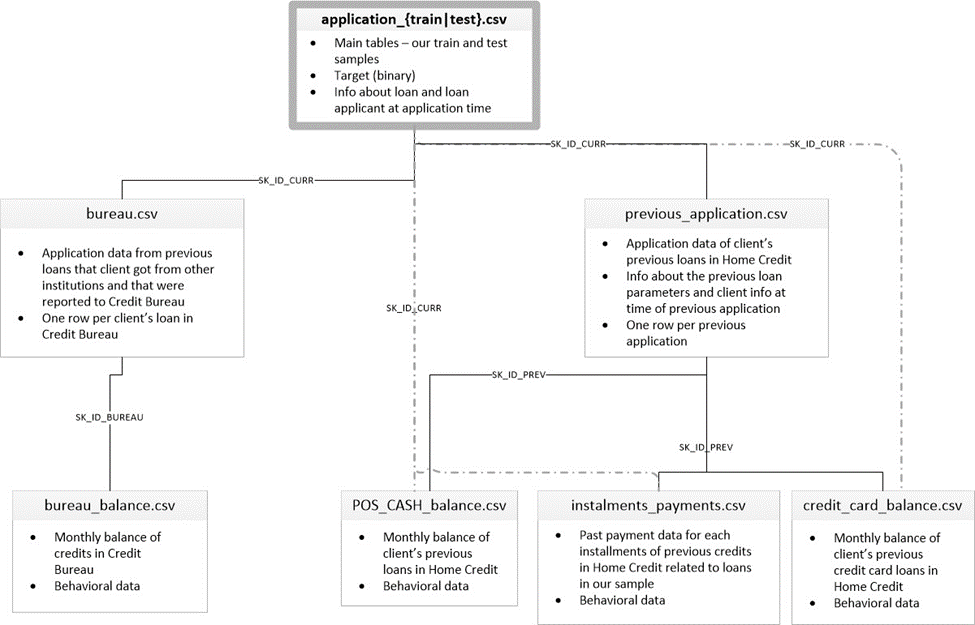

# Import 

In [ ]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
import plotly.graph_objects as go
import statsmodels.api as smd

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, f1_score, precision_score, recall_score
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [ ]:
# Import Data
application_train = pd.read_csv("application_train.csv",encoding = "ISO-8859-1")
application_test = pd.read_csv("application_test.csv",encoding = "ISO-8859-1")
bureau = pd.read_csv("bureau.csv",encoding = "ISO-8859-1")
bureau_balance = pd.read_csv("bureau_balance.csv",encoding = "ISO-8859-1")
previous_application = pd.read_csv("previous_application.csv",encoding = "ISO-8859-1")
POSH_CASH_balance = pd.read_csv("POS_CASH_balance.csv",encoding = "ISO-8859-1")
credit_card_balance = pd.read_csv("credit_card_balance.csv",encoding = "ISO-8859-1")
installments_payments = pd.read_csv("installments_payments.csv",encoding = "ISO-8859-1")

# Data Understanding and Preparation

In [ ]:
# Dimensi Data
print("Dimensi application train :", application_train.shape[0], "baris dan", application_train.shape[1], "kolom")
print("Dimensi application test :", application_test.shape[0], "baris dan", application_test.shape[1], "kolom")
print("Dimensi bureau :", bureau.shape[0], "baris dan", bureau.shape[1], "kolom")
print("Dimensi bureau balance :", bureau_balance.shape[0], "baris dan", bureau_balance.shape[1], "kolom")
print("Dimensi previous application :", previous_application.shape[0], "baris dan", previous_application.shape[1], "kolom")
print("Dimensi POSH CASH balance :", POSH_CASH_balance.shape[0], "baris dan", POSH_CASH_balance.shape[1], "kolom")
print("Dimensi credit card balance :", credit_card_balance.shape[0], "baris dan", credit_card_balance.shape[1], "kolom")
print("Dimensi installments payments :", installments_payments.shape[0], "baris dan", installments_payments.shape[1], "kolom")

In [ ]:
# Application Train
# Menampilkan 3 data teratas
application_train.head(3)

In [ ]:
# Application Test
# Menampilkan 3 data teratas
application_test.head(3)

In [ ]:
# Bureau
# Menampilkan 3 data teratas
bureau.head(3)

In [ ]:
# Bureau Balance
# Menampilkan 3 data teratas
bureau_balance.head(3)

In [ ]:
# Previous Application
# Menampilkan 3 data teratas
previous_application.head(3)

In [ ]:
# Posh Cash Balance
# Menampilkan 3 data teratas
POSH_CASH_balance.head(3)

In [ ]:
# Credit Card Balance
# Menampilkan 3 data teratas
credit_card_balance.head(3)

In [ ]:
# Installments Payments
# Menampilkan 3 data teratas
installments_payments.head(3)

In [ ]:
def DataUnderstanding(data):
        print("=======================================================================================================")
        # Dimensi Data
        print("Dimensi :", data.shape[0], "baris dan", data.shape[1], "kolom")
        print("=======================================================================================================")
        # Menghitung banyaknya Data Duplikat
        print("Jumlah data duplikat :", data[data.duplicated()].sum()[0])
        print("=======================================================================================================")
        # Tipe Data
        print(data.dtypes)
        print("=======================================================================================================")
        # Menghitung banyaknya kolom dari beberapa jenis data
        print(data.dtypes.value_counts())
        print("=======================================================================================================")
        # Jumlah kelas unik dari tipe data object
        print(data.select_dtypes('object').apply(pd.Series.nunique, axis = 0))
        print("=======================================================================================================")
        # Persentase Missing Value
        total = data.isnull().sum().sort_values(ascending=False)
        percent = ((data.isnull().sum()/data.isnull().count())*100).round(1).sort_values(ascending=False)
        missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', '% Total Missing'])
        print(missing_data)
        print("=======================================================================================================")
        # Melihat deskripsi data
        print(data.describe(exclude=['object']).transpose())
        print("=======================================================================================================")

In [ ]:
# Application Train
DataUnderstanding(application_train)

In [ ]:
# Application Test
DataUnderstanding(application_test)

In [ ]:
# Bureau
DataUnderstanding(bureau)

In [ ]:
# Bureau Balance
DataUnderstanding(bureau_balance)

In [ ]:
# Previous Application
DataUnderstanding(previous_application)

In [ ]:
# Posh Cash Balance
DataUnderstanding(POSH_CASH_balance)

In [ ]:
# Credit Card Balance
DataUnderstanding(credit_card_balance)

In [ ]:
# Installments Payments
DataUnderstanding(installments_payments)

In [ ]:
# Membuat kolom AGE
for DAYS_BIRTH in application_train:
    application_train["AGE"]=(application_train["DAYS_BIRTH"]/-365).round(0)

In [ ]:
# Membuat kolom AGE
for DAYS_BIRTH in application_test:
    application_test["AGE"]=(application_test["DAYS_BIRTH"]/-365).round(0)

In [ ]:
# Membuat kategori usia 
application_train["AGE_CATEGORY"]=pd.cut(application_train["AGE"],
                         bins=[0,19,29,39,49,59,70],
                         labels=["Late Ten","Twenty","Thirty","Fourty","Fifty","Above Sixty"]).astype("object")

application_test["AGE_CATEGORY"]=pd.cut(application_test["AGE"],
                         bins=[0,19,29,39,49,59,70],
                         labels=["Late Ten","Twenty","Thirty","Fourty","Fifty","Above Sixty"]).astype("object")

In [ ]:
# Melihat korelasi 
correlations=application_train.corr()["TARGET"].sort_values()

# Display correlations
print("=======================================================================================================")
print("Most Positive Correlations")
print("=======================================================================================================")
print(correlations.tail(10))
print("=======================================================================================================")
print("Most Negative Correlations")
print("=======================================================================================================")
print(correlations.head(10))
print("=======================================================================================================")

In [ ]:
# Extract the EXT_SOURCE variables and show correlations
apptrain_corr = application_train[['TARGET', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH']]
apptrain_corrs = apptrain_corr.corr()
apptrain_corrs

# Heatmap of correlations
plt.figure(figsize = (20, 10))
sns.heatmap(apptrain_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap', fontsize=20);

#Correlation heatmap
#plt.figure(figsize=(20,10))
#sns.heatmap(x_train.corr(),annot = True)
#plt.show()

# Visualization

In [ ]:
# Membuat barplot TARGET
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="TARGET", data=application_train, color="c")
plt.title("TARGET", fontsize=20)

In [ ]:
# Membuat barplot GENDER
f, ax = plt.subplots(figsize=(5, 7))
sns.countplot(x="CODE_GENDER", data=application_train, color="pink")
plt.title("GENDER", fontsize=20)

In [ ]:
# Plot target berdasarkan gender
f, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x="TARGET", data=application_train, hue="CODE_GENDER")
plt.title("TARGET BY CODE GENDER", fontsize=20)

In [ ]:
# Plot Contract Type
t = application_train['NAME_CONTRACT_TYPE'].value_counts()
labels = t.index
values = t.values
colors = ['royalblue','darkblue']
#color='#000000'
trace = go.Pie(labels=labels, values=values, textinfo='label+percent',marker=dict(colors=colors, line=dict(color='#fff', width=2)))
layout = go.Layout(title='Contract Type', height=400)
fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [ ]:
# Membuat plot FAMILY STATUS
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="NAME_FAMILY_STATUS", data=application_train, color="y")
plt.title("FAMILY STATUS", fontsize=20)

In [ ]:
# Plot FLAG OWN REALTY
t = application_train['FLAG_OWN_REALTY'].value_counts()
labels = t.index
values = t.values
colors = ['lightgreen','darkgreen']
#color='#000000'
trace = go.Pie(labels=labels, values=values, textinfo='label+percent',marker=dict(colors=colors, line=dict(color='#fff', width=2)))
layout = go.Layout(title='Flag Own Realty', height=400)
fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [ ]:
# Plot Education Type
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="NAME_EDUCATION_TYPE", data=application_train, color="red")
plt.title("EDUCATION TYPE", fontsize=20)

In [ ]:
# Plot target berdasarkan EDUCATION TYPE
f, ax = plt.subplots(figsize=(8, 7))
sns.countplot(x="TARGET", data=application_train, hue="NAME_EDUCATION_TYPE", color="purple")
plt.title("TARGET BY EDUCATION TYPE", fontsize=20)

In [ ]:
# Plot target berdasarkan INCOME TYPE
f, ax = plt.subplots(figsize=(10, 5))
sns.countplot(y="NAME_INCOME_TYPE", data=application_train, hue="TARGET", color="navy")
plt.title("TARGET BY INCOME TYPE", fontsize=20)

In [ ]:
# Plot AGE CATEGORY
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="AGE_CATEGORY", data=application_train, color="brown")
plt.title("AGE CATEGORY", fontsize=20)

In [ ]:
# Plot target berdasarkan age category
plt.style.use('fivethirtyeight')
f, ax = plt.subplots(figsize=(10, 5))
sns.countplot(y="AGE_CATEGORY", data=application_train, hue="TARGET", color="turquoise", edgecolor = 'black')
plt.title("TARGET BY AGE CATEGORY", fontsize=20)

In [ ]:
# Membuat histogram dari AGE
plt.style.use('fivethirtyeight')
plt.hist(x="AGE", data=application_train, edgecolor = 'k')
plt.title('AGE'); plt.xlabel('AGE (years)'); plt.ylabel('Count');

# Data Cleaning and Data Pre-Processing

In [ ]:
for index, value in application_train.dtypes.items():
    if value == "object":
        application_train[index] = application_train[index].fillna(application_train[index].mode())
    else:
        application_train[index] = application_train[index].fillna(application_train[index].median())

In [ ]:
for index, value in application_test.dtypes.items():
    if value == "object":
        application_test[index] = application_test[index].fillna(application_test[index].mode())
    else:
        application_test[index] = application_test[index].fillna(application_test[index].median())

In [ ]:
# Menghapus data yang memiliki missing values
application_train.dropna(axis=0, inplace=True)
application_test.dropna(axis=0, inplace=True)

In [ ]:
# Dimensi Data
print("Dimensi application train :", application_train.shape[0], "baris dan", application_train.shape[1], "kolom")
print("Dimensi application test :", application_test.shape[0], "baris dan", application_test.shape[1], "kolom")

In [ ]:
# Persentase Missing Value
print("========================================================")
print("Application Train")
print("========================================================")
print(application_train.isnull().sum())
print("========================================================")
print("Application Test")
print("========================================================")
print(application_test.isnull().sum())
print("========================================================")

In [ ]:
# Create a label encoder object
le = LabelEncoder()

# Iterate through the columns
for col in application_train:
    if application_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(application_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(application_train[col])
            # Transform both training and testing data
            application_train[col] = le.transform(application_train[col])
            application_test[col] = le.transform(application_test[col])

In [ ]:
# one-hot encoding of categorical variables
application_train = pd.get_dummies(application_train)
application_test = pd.get_dummies(application_test)
print('Training Features shape: ', application_train.shape)
print('Testing Features shape: ', application_test.shape)

In [ ]:
target_labels = application_train["TARGET"]
# Menggabungkan application_train dengan application_test
application_train,application_test = application_train.align(application_test, join = 'inner', axis = 1)
application_train["TARGET"]=target_labels

In [ ]:
# Drop the target from the training data
if 'TARGET' in application_train:
    train = application_train.drop(columns = ['TARGET'])
else:
    train = application_train.copy()
    
# Feature names
features = list(train.columns)    

# Copy of the testing data
test = application_test.copy()

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

In [ ]:
application_train.head()

# Modeling and Evaluation

In [ ]:
x = application_train.drop(columns="TARGET")
y = application_train["TARGET"]
#cols = x_train_constant.columns
model = smd.Logit(y, x)
result = model.fit()
result.summary()

In [ ]:
def model(a, b):
    x = a
    y = b
    # Splitting
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)
    
    print("Shape of x_train :", x_train.shape)
    print("Shape of y_train :", y_train.shape)
    print("Shape of x_test :", x_test.shape)
    print("Shape of y_test :", y_test.shape)
    
    # Logistic Regression
    logreg = LogisticRegression()
    # Train on the training data
    logreg = logreg.fit(x_train, y_train)
    # Predict
    y_predlog = logreg.predict(x_test)
    # Evaluasi
    print("=======================================================================")
    print("Logistic Regression")
    print("=======================================================================")
    print("Training Accuracy :", logreg.score(x_train, y_train))
    print("Testing Accuracy :", logreg.score(x_test, y_test))
    print("=======================================================================")
    # Confusion matrix
    print(pd.DataFrame(confusion_matrix(y_test, y_predlog), columns=["Predict NO", "Predict YES"], index=["Actual NO", "Actual YES"]))
    print("=======================================================================")
    # Classification report
    print(classification_report(y_test, y_predlog))
    print("=======================================================================")

    # Random Forest Classifier
    random_forest = RandomForestClassifier()
    # Train on the training data
    random_forest.fit(x_train, y_train)
    # Predict
    y_predrf = random_forest.predict(x_test)
    # Evaluasi
    print("=======================================================================")
    print("Random Forest Classifier")
    print("=======================================================================")
    print("Training Accuracy :", random_forest.score(x_train, y_train))
    print("Testing Accuracy :", random_forest.score(x_test, y_test))
    print("=======================================================================")
    # Confusion matrix
    print(pd.DataFrame(confusion_matrix(y_test, y_predrf), columns=["Predict NO", "Predict YES"], index=["Actual NO", "Actual YES"]))
    print("=======================================================================")
    # Classification report
    print(classification_report(y_test, y_predrf))
    print("=======================================================================")

In [ ]:
model(train, target_labels)

In [ ]:
x = train
y = target_labels
# Splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [ ]:
# Logistic Regression
logreg = LogisticRegression()
# Train on the training data
logreg = logreg.fit(x_train, y_train)

# ROC Curve Logistic Regression
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
# Random Forest Classifier
random_forest = RandomForestClassifier()
# Train on the training data
random_forest.fit(x_train, y_train)

# ROC Curve Random Forest Classifier
logit_roc_auc = roc_auc_score(y_test, random_forest.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, random_forest.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# PREDICT

In [ ]:
# Make predictions
# Make sure to select the second column only
logreg_pred =logreg.predict_proba(test)[:, 1]
# Submission dataframe
submit = application_test[['SK_ID_CURR']]
submit['TARGET'] = logreg_pred

#Creating new column 'pred' with 1 if logreg_prob > 0.5 else 0
submit['Predicted'] = submit.TARGET.map(lambda x: 1 if x>0.5 else 0)
submit

submit.head(10)

In [ ]:
submit.to_csv("Logistic Regression.csv", index=False)